<a href="https://colab.research.google.com/github/hadwin-357/GCN/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest

example of implementing Random Forest using sckikit-learn

In [1]:
import pandas as pd
#read into data
df = pd.read_csv('./data/possum.csv')
df.sample(5, random_state=42)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
30,31,1,Vic,m,3.0,92.8,54.1,93.0,37.0,68.0,52.5,14.5,27.0,31.0
65,66,5,other,f,3.0,90.4,55.8,86.0,36.5,63.2,44.2,15.7,26.5,34.0
64,65,5,other,f,5.0,93.5,57.4,88.5,38.0,68.2,41.7,14.0,29.0,38.5
53,54,4,other,m,7.0,96.9,63.0,91.5,43.0,71.3,46.0,17.5,30.0,36.5
45,46,2,Vic,m,NaN,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0


In [4]:
# clean up data : remove missing data
df =df.dropna()
# remove unrelevent features and sepectere feateures fro label(Sex)
X = df.drop(['case', 'site', 'Pop','sex'],axis=1)
y = df['sex']


In [6]:
# Training random forest model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
#hyperparameter in RF: n_estimateor (60 bootstrapping, ), max_depth  min_sample_split (to limit overfitting)
rf_model = RandomForestClassifier(n_estimators=60, max_features='sqrt', random_state=42, bootstrap=True)
rf_model.fit(X_train, y_train)



RandomForestClassifier(n_estimators=60, random_state=42)

In [7]:
#make predicition
predicts = rf_model.predict(X_test)
print(predicts)
# probabilities
rf_model.predict_proba(X_test)


['m' 'm' 'f' 'm' 'm' 'f' 'f' 'm' 'f' 'm' 'm' 'm' 'f' 'm' 'f' 'm' 'f' 'm'
 'm' 'f' 'm' 'f' 'f' 'm' 'm' 'f' 'f' 'f' 'f' 'm' 'm']


array([[0.4       , 0.6       ],
       [0.26666667, 0.73333333],
       [0.8       , 0.2       ],
       [0.45      , 0.55      ],
       [0.11666667, 0.88333333],
       [0.76666667, 0.23333333],
       [0.6       , 0.4       ],
       [0.16666667, 0.83333333],
       [0.76666667, 0.23333333],
       [0.28333333, 0.71666667],
       [0.31666667, 0.68333333],
       [0.38333333, 0.61666667],
       [0.63333333, 0.36666667],
       [0.48333333, 0.51666667],
       [0.51666667, 0.48333333],
       [0.4       , 0.6       ],
       [0.55      , 0.45      ],
       [0.21666667, 0.78333333],
       [0.11666667, 0.88333333],
       [0.78333333, 0.21666667],
       [0.18333333, 0.81666667],
       [0.68333333, 0.31666667],
       [0.55      , 0.45      ],
       [0.38333333, 0.61666667],
       [0.41666667, 0.58333333],
       [0.55      , 0.45      ],
       [0.73333333, 0.26666667],
       [0.56666667, 0.43333333],
       [0.51666667, 0.48333333],
       [0.15      , 0.85      ],
       [0.

In [8]:
# the associated categories for the probablities
rf_model.classes_

array(['f', 'm'], dtype=object)

In [11]:
# feature selection
# show the importance of feature in splitting(increasing purity the most)
rf_model.feature_importances_

array([0.04621032, 0.12761889, 0.0872464 , 0.11833012, 0.12152537,
       0.10673998, 0.10815554, 0.14871805, 0.0615936 , 0.07386173])

In [12]:
importance =rf_model.feature_importances_
columns=X.columns
for i in range(len(columns)):
  print(f'The importance of {columns[i]} is {importance[i]:.3f}')

The importance of age is 0.046
The importance of hdlngth is 0.128
The importance of skullw is 0.087
The importance of totlngth is 0.118
The importance of taill is 0.122
The importance of footlgth is 0.107
The importance of earconch is 0.108
The importance of eye is 0.149
The importance of chest is 0.062
The importance of belly is 0.074


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm=confusion_matrix(y_test, predicts)
print(cm)
acc = accuracy_score(y_test, predicts)
print(acc)

[[ 7  6]
 [ 7 11]]
0.5806451612903226


In [16]:
# customized accuracy function
(y_test == predicts).sum()/len(y_test)

0.5806451612903226

In [17]:
(y_train == rf_model.predict(X_train)).sum()/len(y_train)

1.0

In [ ]:
# definitely over fitting

The model is overfitting.

We can play with hypterparmaters and different emsemble mothods
or try advanced tree-based mothods

In [21]:
accuracy=[]
for i in range(60, 150, 10):
  rf_model = RandomForestClassifier(n_estimators=i, max_features='sqrt', random_state=42, bootstrap=True)
  rf_model.fit(X_train, y_train)
  acc =(y_test ==rf_model.predict(X_test)).sum()/len(y_test)
  accuracy.append(acc)



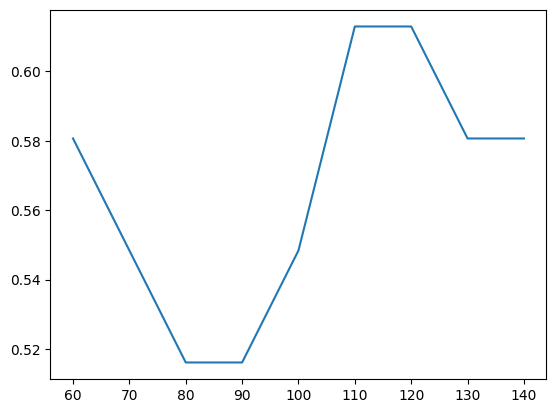

In [23]:
# plot how hyperparameters affact accuracy
import matplotlib.pyplot as plt
plt.plot(range(60,150,10),accuracy)